In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import time
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC 

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
data['Revenue'] = data['Revenue'].astype(int)
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [4]:
data['Weekend'] = data['Weekend'].astype(int)
data['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [5]:
data = pd.get_dummies(data = data, columns=['Month', 'VisitorType'], drop_first=True)
data.shape

(12330, 27)

In [6]:
x = data.drop(columns='Revenue')
y = data['Revenue']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)
X_train=xTrain
Y_train=yTrain
X_test=xTest
Y_test=yTest
y_test=yTest

The time of execution of above program is : 0.08022546768188477


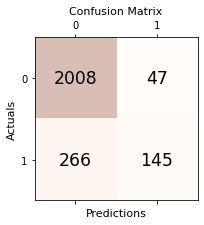

Accuracy: 0.873
Precision: 0.755
Recall: 0.353
F1 Score: 0.481
Sensitivity: 0.353
Specifity: 0.977
Error Rate: 0.127
TPR: 0.353
FPR: 0.023
AUC: 0.665


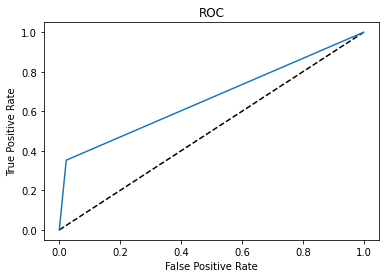

In [7]:
import time
 
# record start time
start = time.time()

sc_x = StandardScaler()
xTrain = sc_x.fit_transform(xTrain) 
xTest = sc_x.transform(xTest)

classifier = LogisticRegression(random_state = 0)
classifier.fit(xTrain,yTrain)

y_pred = classifier.predict(xTest)

# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)


conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()



The time of execution of above program is : 0.3689758777618408


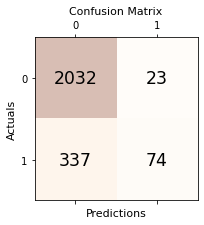

Accuracy: 0.854
Precision: 0.763
Recall: 0.180
F1 Score: 0.291
Sensitivity: 0.180
Specifity: 0.989
Error Rate: 0.146
TPR: 0.180
FPR: 0.011
AUC: 0.584


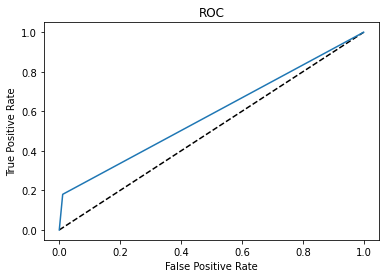

In [8]:
import time
 
# record start time
start = time.time()



knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)



# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)


conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()



The time of execution of above program is : 0.023985624313354492


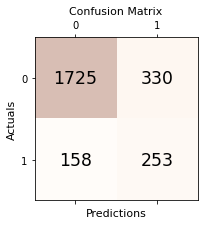

Accuracy: 0.802
Precision: 0.434
Recall: 0.616
F1 Score: 0.509
Sensitivity: 0.616
Specifity: 0.839
Error Rate: 0.198
TPR: 0.616
FPR: 0.161
AUC: 0.727


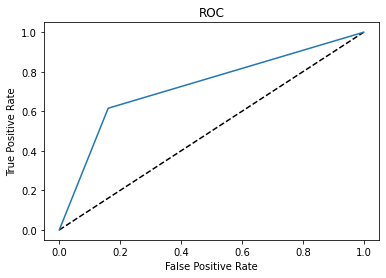

In [9]:
# Gaussian Naive Bayes

 
# record start time
start = time.time()




gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
y_pred = gaussian.predict(X_test)



# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


The time of execution of above program is : 0.5615668296813965


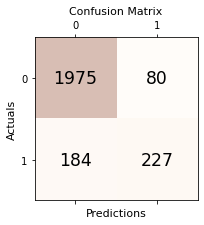

Accuracy: 0.893
Precision: 0.739
Recall: 0.552
F1 Score: 0.632
Sensitivity: 0.552
Specifity: 0.961
Error Rate: 0.107
TPR: 0.552
FPR: 0.039
AUC: 0.757


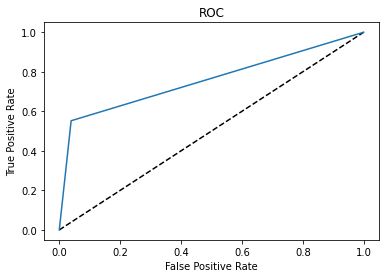

In [10]:
import time
 
# record start time
start = time.time()

clf = RandomForestClassifier(n_estimators = 30) 
clf.fit(xTrain, yTrain)
y_pred = clf.predict(xTest)

# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)


conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()




Learning rate:  1
Accuracy score (training): 0.896
Accuracy score (validation): 0.882

Learning rate:  1.25
Accuracy score (training): 0.896
Accuracy score (validation): 0.880

Learning rate:  1.5
Accuracy score (training): 0.881
Accuracy score (validation): 0.872

Learning rate:  1.75
Accuracy score (training): 0.869
Accuracy score (validation): 0.854

Learning rate:  2
Accuracy score (training): 0.860
Accuracy score (validation): 0.837

Confusion Matrix:
[[1992  102]
 [ 188  184]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2094
           1       0.64      0.49      0.56       372

    accuracy                           0.88      2466
   macro avg       0.78      0.72      0.75      2466
weighted avg       0.87      0.88      0.88      2466

Area under ROC curve = 0.87
The time of execution of above program is : 0.5229952335357666


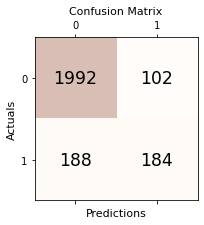

Accuracy: 0.882
Precision: 0.643
Recall: 0.495
F1 Score: 0.559
Sensitivity: 0.495
Specifity: 0.951
Error Rate: 0.118
TPR: 0.495
FPR: 0.049
AUC: 0.723


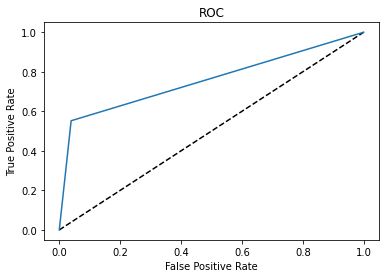

In [11]:
from sklearn.preprocessing import MinMaxScaler
start = time.time()

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# split training feature and target sets into training and validation subsets
from sklearn.model_selection import train_test_split

X_train_sub, X_validation_sub, y_train_sub, y_validation_sub = train_test_split(X_train_scale, Y_train, random_state=0)

# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [1, 1.25,1.5,1.75,2]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train_sub, y_train_sub)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_sub, y_train_sub)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation_sub, y_validation_sub)))
    print()
    
    

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train_sub, y_train_sub)
predictions = gb.predict(X_validation_sub)

print("Confusion Matrix:")
print(confusion_matrix(y_validation_sub, predictions))
print()
print("Classification Report")
print(classification_report(y_validation_sub, predictions))

y_scores_gb = gb.decision_function(X_validation_sub)
fpr_gb, tpr_gb, _ = roc_curve(y_validation_sub, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))


print("The time of execution of above program is :", time.time()-start)

conf_matrix = confusion_matrix(y_validation_sub, predictions)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)



fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


The time of execution of above program is : 0.23840928077697754


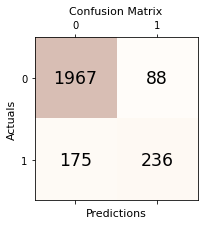

Accuracy: 0.893
Precision: 0.728
Recall: 0.574
F1 Score: 0.642
Sensitivity: 0.574
Specifity: 0.957
Error Rate: 0.107
TPR: 0.574
FPR: 0.043
AUC: 0.766


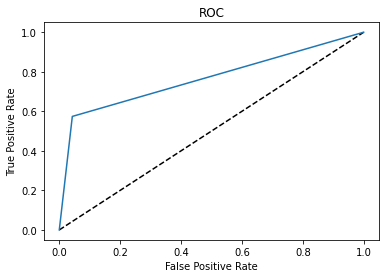

In [12]:
# Gaussian Naive Bayes

 
# record start time
start = time.time()



import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)



# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)



fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


The time of execution of above program is : 0.1032266616821289


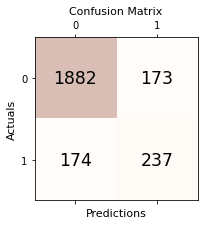

Accuracy: 0.859
Precision: 0.578
Recall: 0.577
F1 Score: 0.577
Sensitivity: 0.577
Specifity: 0.916
Error Rate: 0.141
TPR: 0.577
FPR: 0.084
AUC: 0.746


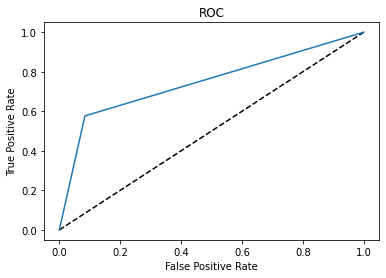

In [13]:

 
# record start time
start = time.time()




dtc = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, Y_train)

y_pred = ada.predict(X_test)




# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)





fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()



The time of execution of above program is : 1.5567247867584229


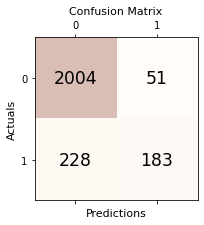

Accuracy: 0.887
Precision: 0.782
Recall: 0.445
F1 Score: 0.567
Sensitivity: 0.445
Specifity: 0.975
Error Rate: 0.113
TPR: 0.445
FPR: 0.025
AUC: 0.710


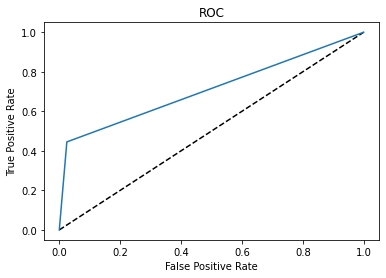

In [14]:

 
# record start time
start = time.time()





etc = ExtraTreesClassifier()
etc.fit(X_train, Y_train)

y_pred = etc.predict(X_test)




# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)





fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()




The time of execution of above program is : 0.05864405632019043


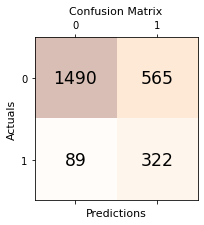

Accuracy: 0.735
Precision: 0.363
Recall: 0.783
F1 Score: 0.496
Sensitivity: 0.783
Specifity: 0.725
Error Rate: 0.265
TPR: 0.783
FPR: 0.275
AUC: 0.754


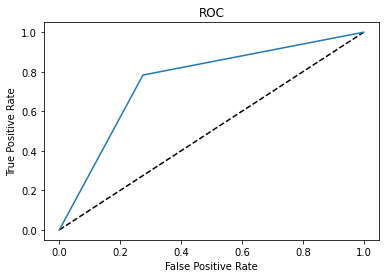

In [15]:

 
# record start time
start = time.time()






Model=QuadraticDiscriminantAnalysis()
Model.fit(X_train,Y_train)
y_pred=Model.predict(X_test)




# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)


conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2
auc = metrics.roc_auc_score(y_test, y_pred)

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()




The time of execution of above program is : 0.831367015838623


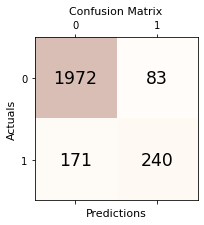

Accuracy: 0.897
Precision: 0.743
Recall: 0.584
F1 Score: 0.654
Sensitivity: 0.584
Specifity: 0.960
Error Rate: 0.103
TPR: 0.584
FPR: 0.040
AUC: 0.772


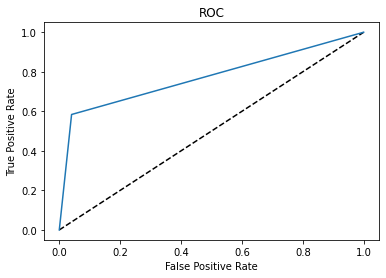

In [16]:
import xgboost as xgb
start = time.time()



my_model = xgb.XGBClassifier()
my_model.fit(X_train, Y_train)
 
# Predicting the Test set results
y_pred = my_model.predict(X_test)
 
# Making the Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)


# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)


conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Iteration 1, loss = 2.17570180
Iteration 2, loss = 0.71316830
Iteration 3, loss = 0.60241158
Iteration 4, loss = 0.56004805
Iteration 5, loss = 0.53104098
Iteration 6, loss = 0.50485359
Iteration 7, loss = 0.48398092
Iteration 8, loss = 0.46638915
Iteration 9, loss = 0.45078130
Iteration 10, loss = 0.45177528
Iteration 11, loss = 0.42981316
Iteration 12, loss = 0.42473464
Iteration 13, loss = 0.40913194
Iteration 14, loss = 0.49343414
Iteration 15, loss = 0.44224904
Iteration 16, loss = 0.41200916
Iteration 17, loss = 0.39733656
Iteration 18, loss = 0.39641005
Iteration 19, loss = 0.37688242
Iteration 20, loss = 0.38681336
Iteration 21, loss = 0.37150658
Iteration 22, loss = 0.38550017
Iteration 23, loss = 0.41471837
Iteration 24, loss = 0.36429965
Iteration 25, loss = 0.37516638
Iteration 26, loss = 0.37697235
Iteration 27, loss = 0.35804741
Iteration 28, loss = 0.34904879
Iteration 29, loss = 0.35604092
Iteration 30, loss = 0.36189011
Iteration 31, loss = 0.35740815
Iteration 32, los

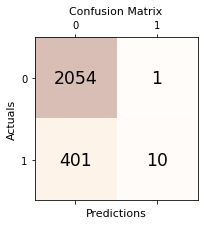

Accuracy: 0.837
Precision: 0.909
Recall: 0.024
F1 Score: 0.047
Sensitivity: 0.024
Specifity: 1.000
Error Rate: 0.163
TPR: 0.024
FPR: 0.000
AUC: 0.512


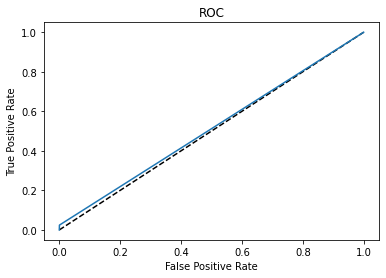

In [17]:
from sklearn.neural_network import MLPClassifier
start = time.time()
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)


# record end time
end = time.time()

print("The time of execution of above program is :", time.time()-start)


conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.title('Confusion Matrix', fontsize=11)
plt.show()

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()